In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
from scipy import signal
import librosa, librosa.display
import pandas as pd
from scipy.fftpack import fft

In [2]:
frequency_sampling, audio_signal = wavfile.read("C:/Users/erdem/JupiterLabCodes/MachineLearning/Final/AudioML/Sounds/Train//sesler2.wav")

In [3]:
# Normalleştirme yapıyoruz
audio_signal = audio_signal / np.power(2, 15)

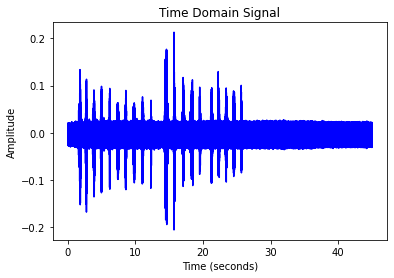

In [4]:
############# Time Domain - 1
time_axis = 1 * np.arange(0, len(audio_signal), 1) / float(frequency_sampling)
plt.plot(time_axis, audio_signal, color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Time Domain Signal')
plt.show()

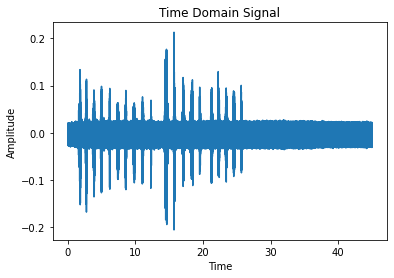

In [5]:
############# Time Domain - 2 Plot
N = (45 - 0) * frequency_sampling
time = np.linspace(0, 45, N)
plt.plot (time, audio_signal)
plt.title ('Time Domain Signal')
plt.xlabel ('Time')
plt.ylabel ('Amplitude')
plt.show ()

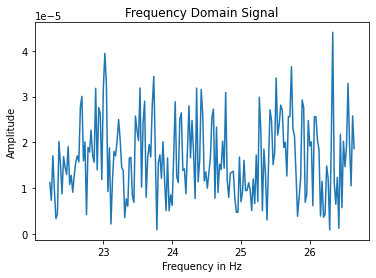

In [6]:
############# Frequency Domain Plot
frequency = np.linspace (0.0, frequency_sampling/2, int (N/2))
freq_data = fft(audio_signal)
y = 2/N * np.abs (freq_data [0:int (N/2)])
plt.plot(frequency[1000:1200], y[1000:1200])
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel("Amplitude")
plt.show()

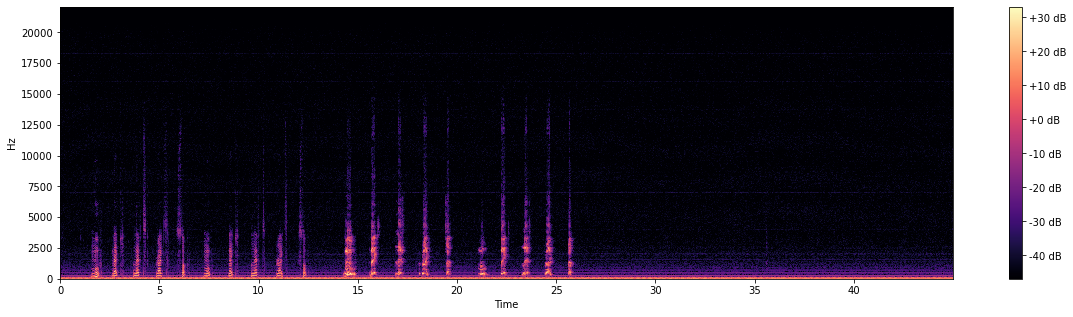

In [7]:
############# Sinyalin STFT sini buluyoruz ve çizdiriyoruz.
sr = 44100
hop_length = 512
n_fft = 2048
X = librosa.stft(audio_signal, n_fft=n_fft, hop_length=hop_length)
S = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(S, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')

In [8]:
############# zero array oluşturuyoruz. Labellar için.
arr = np.zeros( (len(S[1]), ) , dtype=np.int64)
#3876/45 = 86.1 , stft grafiğinde nokta belirle(x) , sonra 86 ile çarp
len(S[1])/45

86.13333333333334

In [9]:
#Abdullah'ın sesi ## Datayı labellıyoruz. Manuel olarak.
arr[129:172]=1 # 1.7 , 2.6
arr[215:267]=2 # 1.7 , 2.6
arr[288:375]=3 # 3.4 , 4.1
arr[408:451]=4 # 5.2 , 6
arr[516:550]=5 # 7 , 7.6
arr[610:654]=1 # 8.8 , 9.5
arr[722:757]=2 # 10.4 , 11.2
arr[817:860]=3 # 12.2 , 12.8
arr[928:971]=4 # 14.1 , 14.8
arr[1049:1075]=5 # 15.9 , 16.6


In [10]:
## Akın'ın sesi ## Datayı labellıyoruz. Manuel olarak.
arr[1221:1281]=1 # 1.7 , 2.6
arr[1346:1376]=2 # 1.7 , 2.6
arr[1436:1489]=3 # 3.4 , 4.1
arr[1556:1604]=4 # 5.2 , 6
arr[1660:1694]=5 # 7 , 7.6
arr[1814:1845]=1 # 8.8 , 9.5
arr[1900:1935]=2 # 10.4 , 11.2
arr[1999:2042]=3 # 12.2 , 12.8
arr[2094:2141]=4 # 14.1 , 14.8
arr[2193:2222]=5 # 15.9 , 16.6

In [11]:
################## Gereksiz yerleri siliyoruz. 40 saniyeden sonrasını
copy_S = S
a_del = np.delete(copy_S, slice(2222,3876), 1)
print(a_del)


[[  8.52944977 -11.67912771   8.58561655 ...   6.49093554   3.12152422
    5.42182592]
 [ 11.19341015  14.18607447   8.16772592 ...  14.45355387  11.61293277
   11.35928317]
 [ 12.80861589  19.29471194  19.94052488 ...  21.91890572  21.91967057
   21.86641706]
 ...
 [-46.90972823 -46.90972823 -46.90972823 ... -46.90972823 -46.90972823
  -46.90972823]
 [-46.90972823 -46.90972823 -46.90972823 ... -46.90972823 -46.90972823
  -46.90972823]
 [-46.90972823 -46.90972823 -46.90972823 ... -46.90972823 -46.90972823
  -46.90972823]]


In [12]:
############## Gereksiz yerleri siliyoruz. 40 saniyeden sonrasını
copy_arr = arr
a1_del = np.delete(copy_arr, slice(2222,3876), 0)
print(a_del)
a_del_transpose = np.transpose(a_del)
## X ve y'mizi tanımlıyoruz.
X = a_del_transpose
y = a1_del

[[  8.52944977 -11.67912771   8.58561655 ...   6.49093554   3.12152422
    5.42182592]
 [ 11.19341015  14.18607447   8.16772592 ...  14.45355387  11.61293277
   11.35928317]
 [ 12.80861589  19.29471194  19.94052488 ...  21.91890572  21.91967057
   21.86641706]
 ...
 [-46.90972823 -46.90972823 -46.90972823 ... -46.90972823 -46.90972823
  -46.90972823]
 [-46.90972823 -46.90972823 -46.90972823 ... -46.90972823 -46.90972823
  -46.90972823]
 [-46.90972823 -46.90972823 -46.90972823 ... -46.90972823 -46.90972823
  -46.90972823]]


In [13]:
# data kaydetme
#"""
df_data = pd.DataFrame(data=X)
df_data.to_csv(r'C:/Users/erdem/JupiterLabCodes/MachineLearning/Final/AudioML/Sounds/Train/dataset.csv',index=False,header=True)
#"""

In [14]:
######################## MACHINE LEARNING ########################
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [15]:
#denenecek modellerin yüklenmesi
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVC', SVC()))

In [16]:
# Confusion Matrix için labelları listeye ekliyoruz.
labels_y = ['move','back','left','right','stop']

In [17]:

# modellerin sınanması
results = []
names = []

##### csv ye kaydetmek için gerekli listeler
kfolds = []
acc = [] 
micro_ps = []
micro_rs = [] 
micro_f1 = [] 
macro_ps = [] 
macro_rs = [] 
macro_f1 = [] 
weighted_ps = [] 
weighted_rs = [] 
weighted_f1 = [] 

validation_size = 0.25
seed = 5
num_folds = 10
RMS = 'neg_mean_squared_error'


len(X)

2222

In [18]:
# Datayı %20 test %80 train olacak şekilde ayırıyoruz.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = validation_size,random_state = seed)

RF kfold eğitiliyor
RF normal eğitiliyor
RF- kfold neg_mean_score = -1.6889037008823717
RF- accuracy_score = % 85.39325842696628
RF- precision_score micro = % 85.39325842696628
RF- recall_score micro = % 85.39325842696628
RF- f1_score micro = % 85.39325842696628
RF- precision_score macro = % 90.26636652114156
RF- recall_score macro = % 67.74012039969487
RF- f1_score macro = % 74.97990581669005
RF- precision_score weighted = % 86.75782027104731
RF- recall_score weighted = % 85.39325842696628
RF- f1_score weighted = % 84.07394849664375
RF  mse: 1.3146067415730338


C:\Users\erdem\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (5).

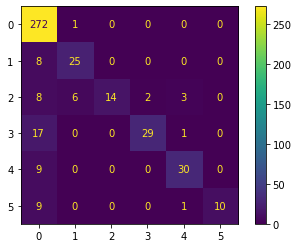

In [19]:


"""
# test verisinin çıkarımı
scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)
# transform the validation dataset
X_test_rescaled = scaler.transform(X_test)
"""
# Machine Learning uyguladığımız yer.
for modelName , model in models:
    print(modelName+" kfold eğitiliyor")
    
    # kfold kısmı 'neg_mean_squared_error' kullanıyoruz
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=RMS)
    results.append(cv_results)
    names.append(modelName)
    
    # Modeli eğitiyoruz.
    print(modelName+" normal eğitiliyor")
    model.fit(X_train,y_train)
    # Modelde test datasını deneyerek tahmin değerlerini alıyoruz.
    y_pred = model.predict(X_test)

    # precision, recall, f1, accuracy skorları hesaplıyoruz.
    ACC = accuracy_score(y_test,y_pred) 
    PS_mi = precision_score(y_test,y_pred,average='micro')
    RS_mi = recall_score(y_test,y_pred,average='micro')
    F1_mi = f1_score(y_test,y_pred,average='micro')
    
    PS_ma = precision_score(y_test,y_pred,average='macro')
    RS_ma = recall_score(y_test,y_pred,average='macro')
    F1_ma = f1_score(y_test,y_pred,average='macro')
    
    PS_we = precision_score(y_test,y_pred,average='weighted')
    RS_we = recall_score(y_test,y_pred,average='weighted')
    F1_we = f1_score(y_test,y_pred,average='weighted')
    
    print(modelName + "-" + " kfold neg_mean_score = " + str(cv_results.mean()))
    print(modelName + "-" + " accuracy_score = % " + str(ACC*100))
    print(modelName + "-" + " precision_score micro = % " + str(PS_mi*100))
    print(modelName + "-" + " recall_score micro = % " + str(RS_mi*100))
    print(modelName + "-" + " f1_score micro = % " + str(F1_mi*100))
    
    print(modelName + "-" + " precision_score macro = % " + str(PS_ma*100))
    print(modelName + "-" + " recall_score macro = % " + str(RS_ma*100))
    print(modelName + "-" + " f1_score macro = % " + str(F1_ma*100))
    
    print(modelName + "-" + " precision_score weighted = % " + str(PS_we*100))
    print(modelName + "-" + " recall_score weighted = % " + str(RS_we*100))
    print(modelName + "-" + " f1_score weighted = % " + str(F1_we*100))
    print(modelName," mse:", mean_squared_error(y_test, y_pred)) 
    
    # Confusion Matrix tablosu oluşturuyoruz.
    plot_confusion_matrix(model, X_test, y_test, display_labels=labels_y, xticks_rotation="vertical")
    plt.savefig(modelName +'.png')
        
    # Bu kısım modelin daha sonra da kullanılabilmesi için kayıt yapmaktadır.
    import pickle
    filename = modelName+'_scaled''_model.sav'
    pickle.dump(model , open(filename, 'wb'))
    
    ################################## Listelere sonuçları ekliyoruz.
    kfolds.append(cv_results.mean())
    acc.append(round(ACC*100, 2))
    micro_ps.append(round(PS_mi*100, 2))
    micro_rs.append(round(RS_mi*100, 2))
    micro_f1.append(round(F1_mi*100, 2))
    macro_ps.append(round(PS_ma*100, 2))
    macro_rs.append(round(RS_ma*100, 2))
    macro_f1.append(round(F1_ma*100, 2))
    weighted_ps.append(round(PS_we*100, 2))
    weighted_rs.append(round(RS_we*100, 2))
    weighted_f1.append(round(F1_we*100, 2))


################### Sonuçları csv ye kaydediyoruz.
d = {'Models': ['RF','KNN','DT','SVC'],'Kfold_NMSE': kfolds, 'Acc': acc, 'PS_micro': micro_ps, 'RS_micro': micro_rs,
      'F1_micro':micro_f1,'PS_macro':macro_ps,'RS_macro':macro_rs,'F1_macro':macro_f1,
      'PS_weighted':weighted_ps,'RS_weighted':weighted_rs,'F1_weighted':weighted_f1}

df_table = pd.DataFrame(data=d)
df_table.to_csv(r'C:/Users/erdem/JupiterLabCodes/MachineLearning/Final/AudioML/Untitled1.ipynb/table_no_scaled.csv',index=False,header=True)